In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
data = pd.read_csv(r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\lbf_historical_stats.csv")
data.head()

,temporada,torneo,posicion,club,jj,jg,je,jp,gf,gc,...,dif2,pts2,jj3,jg3,je3,jp3,gf3,gc3,dif3,pts3
0,2019-2020,Apertura,19,Necaxa,18,1,3,14,6,35,...,-9,5,9,0,1,8,0,20,-20,1
1,2022-2023,Apertura,9,Pumas,17,7,3,7,30,36,...,9,14,9,3,1,5,12,27,-15,10
2,2018-2019,Apertura,1,Tigres,16,12,4,0,51,19,...,17,18,8,7,1,0,26,11,15,22
3,2018-2019,Apertura,2,Pachuca,16,12,2,2,31,14,...,10,21,8,5,2,1,16,9,7,17
4,2018-2019,Apertura,3,América,16,11,2,3,28,12,...,7,18,8,5,2,1,15,6,9,17


In [13]:
def classify_rank(position):
    if position <= 4:
        return 0
    elif position <= 14:
        return 1
    else:
        return 2

In [15]:
data['rank_group']=data['posicion'].apply(classify_rank)

In [17]:
# Select important features for classification
features = ['jj', 'jg', 'je', 'jp', 'gf', 'gc', 'dif']
X = data[features]  # Independent variables
y = data['rank_group']  # Dependent variable (classification label)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

C:\Users\ShePlay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [25]:
# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")

# Classification report
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.91

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.92      0.94      0.93        35
           2       1.00      0.89      0.94         9

    accuracy                           0.91        54
   macro avg       0.91      0.88      0.89        54
weighted avg       0.91      0.91      0.91        54



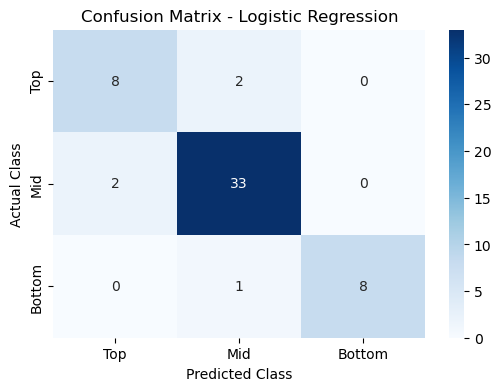

In [27]:
# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', xticklabels=['Top', 'Mid', 'Bottom'], yticklabels=['Top', 'Mid', 'Bottom'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Random Forest Accuracy: 0.89

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.91      0.91      0.91        35
           2       0.88      0.78      0.82         9

    accuracy                           0.89        54
   macro avg       0.87      0.86      0.86        54
weighted avg       0.89      0.89      0.89        54



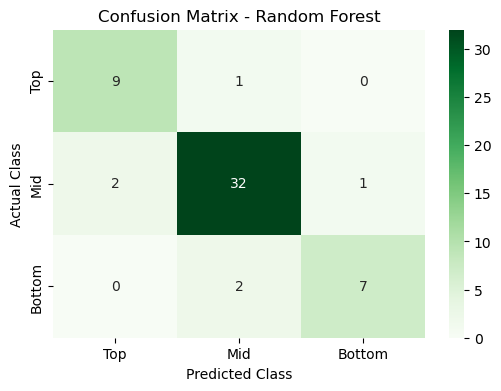


Model Comparison:

Logistic Regression Accuracy: 0.91
Random Forest Accuracy: 0.89


In [29]:
from sklearn.ensemble import RandomForestClassifier

# ==============================
# 📌 STEP 1: Train Random Forest Classifier
# ==============================

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# ==============================
# 📌 STEP 2: Evaluate Random Forest Classifier
# ==============================

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Classification report
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', xticklabels=['Top', 'Mid', 'Bottom'], yticklabels=['Top', 'Mid', 'Bottom'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ==============================
# 📌 STEP 3: Compare Logistic Regression vs Random Forest
# ==============================

print(f"\nModel Comparison:\n")
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
